# 2d molecular model of hard discs B

Lets put in the two-dimensional space 20 hard discs (radius=1.0) following the only two rules:

- Every disc must be in contact with at least another disc.
- Discs are hard, they can not overlap.

- 4 types of discs
- Different types of center to center distance (bond distance)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
radius={0:1.0, 1:0.8, 2:1.2, 3:1.4}
bond={0:{}, 1:{}, 2:{}, 3:{}}

bond[0][0]=2.2
bond[0][1]=2.0
bond[0][2]=2.5
bond[0][3]=2.6

bond[1][0]=bond[0][1]
bond[1][1]=1.7
bond[1][2]=2.3
bond[1][3]=2.4

bond[2][0]=bond[0][2]
bond[2][1]=bond[1][2]
bond[2][2]=2.6
bond[2][3]=2.8

bond[3][0]=bond[0][3]
bond[3][1]=bond[1][3]
bond[3][2]=bond[2][3]
bond[3][3]=3.0

In [8]:
n_discs = 200

discs_type = np.random.randint(0,4,n_discs)

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    type_ii = discs_type[ii]
    while done is False:
        kk = np.random.randint(ii-10,ii)
        type_kk = discs_type[kk]
        angle = 2*np.pi*np.random.random()
        new_center = bond[type_ii][type_kk]*np.array([np.cos(angle), np.sin(angle)])+positions[kk,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            type_jj = discs_type[jj]
            if dist < radius[type_ii]+radius[type_jj]:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

Let's show now the figure of the resulting 2D random molecular model.

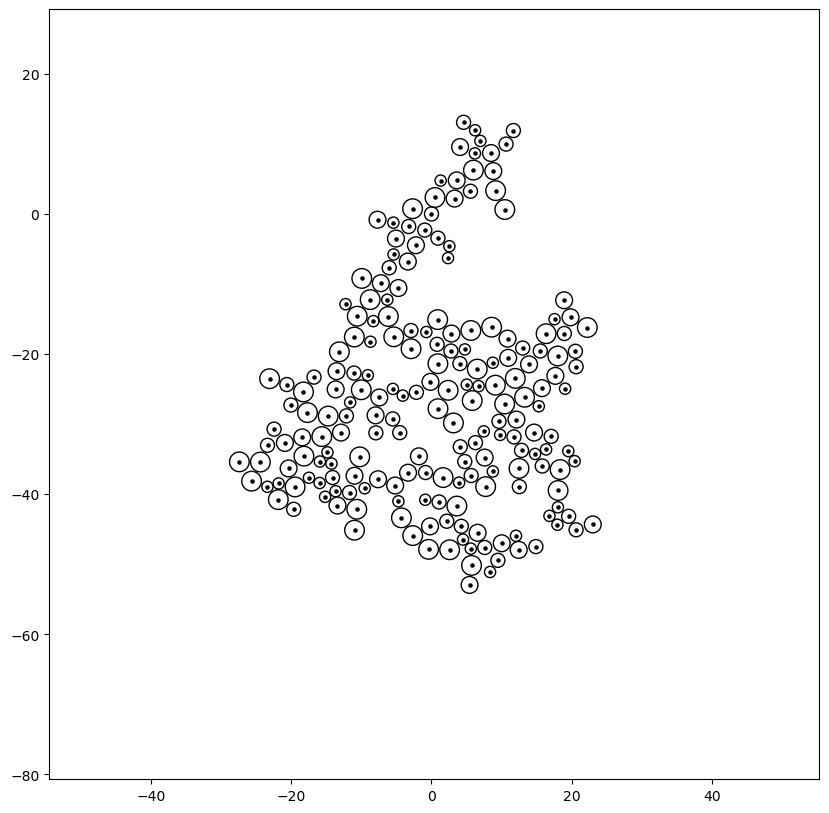

In [9]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius[discs_type[ii]], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Saving the model

In [10]:
radii = [radius[ii] for ii in discs_type]
radii = np.array(radii)

In [11]:
radii

array([1. , 1.4, 1.2, 1.4, 1. , 1. , 0.8, 1. , 1.2, 0.8, 0.8, 1. , 1. ,
       1.2, 1.2, 0.8, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.2, 0.8, 0.8, 0.8,
       1.4, 1.2, 1.4, 1.2, 0.8, 0.8, 1.4, 1.4, 1.2, 1.4, 0.8, 0.8, 1.4,
       1. , 1.2, 1. , 1.4, 1.4, 0.8, 1.4, 1. , 1.2, 1. , 0.8, 1. , 1.2,
       1.2, 0.8, 1. , 0.8, 1. , 1. , 1.4, 0.8, 1.4, 1. , 1. , 1.2, 1.4,
       1.4, 1. , 1. , 1.2, 1. , 1.2, 1.4, 1.4, 1.4, 1.2, 1.4, 1.4, 1. ,
       1. , 1. , 1. , 1. , 1.2, 1.4, 1.4, 1.4, 0.8, 0.8, 1.4, 1.4, 0.8,
       1.4, 1.4, 1.2, 1.4, 1. , 1. , 1.2, 1. , 1.2, 1.4, 0.8, 1.4, 1. ,
       0.8, 1.2, 1.4, 1.4, 1.4, 0.8, 1. , 1. , 1.2, 0.8, 1.2, 0.8, 1.4,
       1.4, 0.8, 1. , 0.8, 0.8, 0.8, 1.2, 1. , 1.4, 1.4, 1.4, 0.8, 1. ,
       1.2, 0.8, 0.8, 1.2, 1.2, 1.4, 0.8, 1.2, 1.4, 0.8, 1.4, 1. , 0.8,
       1.2, 1.2, 0.8, 1. , 0.8, 1.4, 0.8, 1.4, 1.2, 0.8, 1. , 1. , 1. ,
       1.4, 1.4, 1. , 1.4, 1.2, 1.4, 1.4, 1.2, 0.8, 1.2, 1. , 1.4, 1. ,
       0.8, 1. , 0.8, 0.8, 1.2, 1. , 1. , 1. , 0.8, 0.8, 1.4, 1.

In [12]:
import pickle

file = open('model_2d_BB.pkl', 'wb')

pickle.dump('model 2d BB', file)
pickle.dump(positions, file)
pickle.dump(radii, file)

file.close()

In [13]:
file = open('model_2d_BB.pkl', 'rb')

info = pickle.load(file)
coors = pickle.load(file)
radios = pickle.load(file)

file.close()